In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcdefaults()
plt.style.use(["../stylesheet.mplstyle"])
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
filestubs = {
    "Friedman-Grosse-fixed-bags": "Friedman-Grosse",
    "fixed-bags-64": "Friedman-Silverman",
    "thermoelectrics": "Thermoelectric",
    "mechanical": "Mechanical"
}
num_tests = len(filestubs)

In [9]:
def plot_correlation_methods(df, ax, marker_dict):
    for correlation_method, this_df in df.groupby("correlation method"):
        x = this_df["train"]
        y = this_df["mean value"]
        yerr = this_df["std error of value"]
        marker = marker_dict.get(correlation_method, '')
        ax.errorbar(x, y, yerr=yerr, label=correlation_method, marker=marker)

In [16]:
marker_dict = {
    "Bootstrap": "*",
    "Jackknife": 'd',
    "Training Data": 'o',
    "Trivial": ''
}

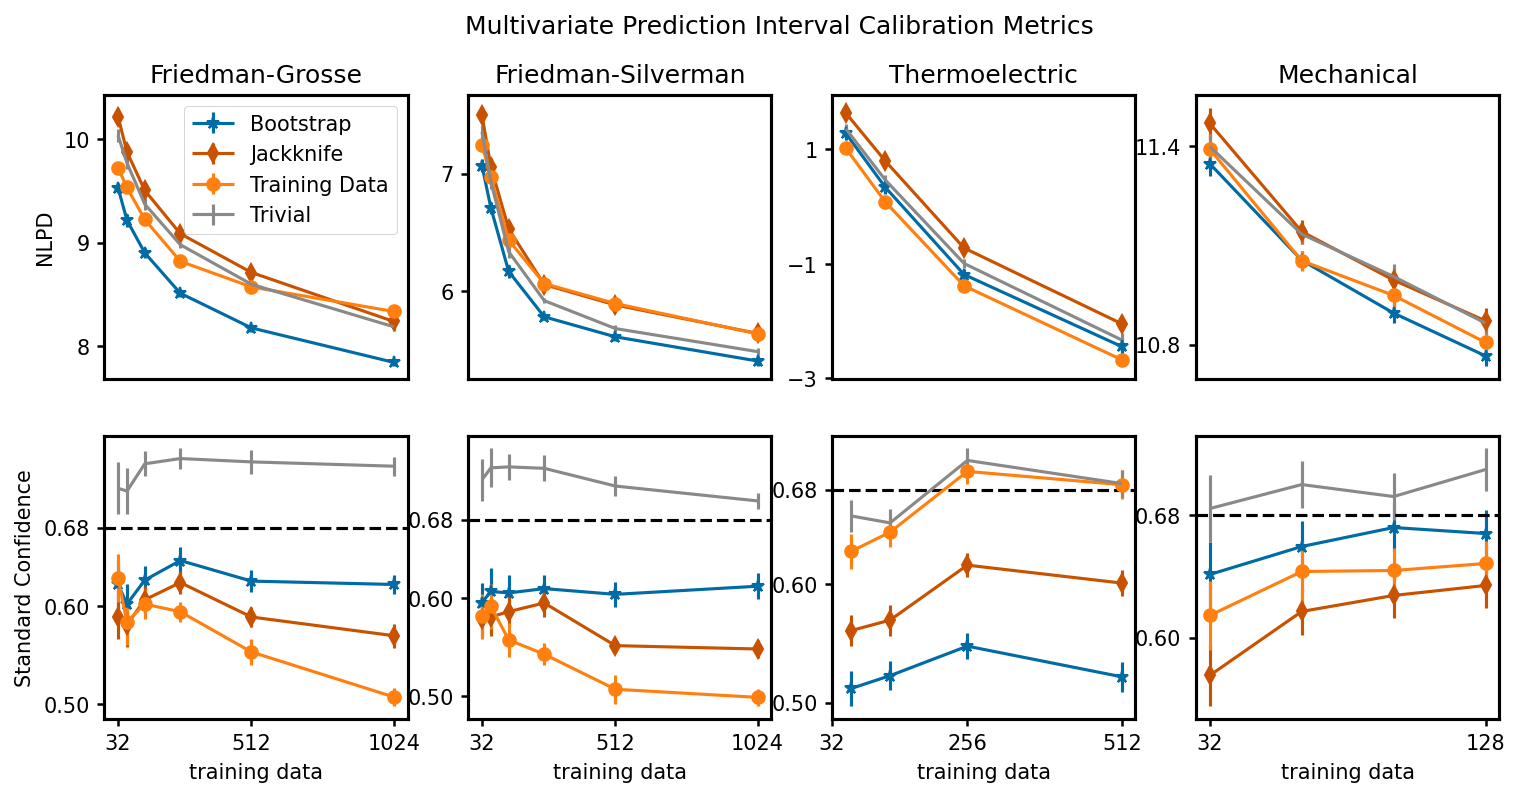

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=num_tests, figsize=(12, 5.4))
for i, (filestub, title) in enumerate(filestubs.items()):
    df_nlpd = pd.read_csv(f"../../correlation-study-n-dims/{filestub}-nlpd.csv")
    df_stdcon = pd.read_csv(f"../../correlation-study-n-dims/{filestub}-stdcon.csv")
    ax_nlpd = axs[0, i]
    ax_stdcon = axs[1, i]
    plot_correlation_methods(df_nlpd, ax_nlpd, marker_dict)
    plot_correlation_methods(df_stdcon, ax_stdcon, marker_dict)
    ax_nlpd.set_xticks([])
    ax_stdcon.axhline(0.68, color='k', linestyle='--')
    ax_stdcon.set_xlabel("training data")
    ax_nlpd.set_title(title, )
axs[0, 0].set_ylabel("NLPD")
axs[1, 0].set_ylabel("Standard Confidence")
axs[0, 0].legend()
axs[0, 0].set_yticks([8.0, 9.0, 10.0])
axs[0, 1].set_yticks([6.0, 7.0])
axs[0, 2].set_yticks([-3, -1, 1])
axs[0, 3].set_yticks([10.8, 11.4])
axs[1, 0].set_yticks([0.5, 0.6, 0.68])
axs[1, 1].set_yticks([0.5, 0.6, 0.68])
axs[1, 2].set_yticks([0.5, 0.6, 0.68])
axs[1, 3].set_yticks([0.6, 0.68])
axs[1, 0].set_xticks([32, 512, 1024])
axs[1, 1].set_xticks([32, 512, 1024])
axs[1, 2].set_xticks([32, 256, 512])
axs[1, 3].set_xticks([32, 128])
plt.suptitle("Multivariate Prediction Interval Calibration Metrics")
plt.savefig("fig3.svg")